In [23]:
from manager import load_obj, save_obj
import os
import re
import string
from collections import Counter
from pprint import pprint
from tqdm.notebook import tqdm
from itertools import combinations

In [2]:
works = load_obj("cleaned_corpus")

In [3]:
count= 0
for work in works:
    if work.references != "none":
        count += 1

In [4]:
count

502

# Get Most Common Autors (only once per Document)

### Heuristic detection of same label (next two fields)

In [5]:
with open('names_with_work.txt', encoding= "utf-8") as f:
    lines = [line.rstrip() for line in f]

In [6]:
aut_dic ={}
for line in lines:
    names = line.split("\t")
    aut_dic[names[0]] = names[1:]

In [7]:
aut_dic ## all authors mentioned in the bibliogrpahy

{'https://www.hausarbeiten.de/document/889420': ['barner, wilfried',
  'brake, michael, lars',
  'glanz, berit',
  'glanz, berit',
  'glaser, peter',
  'glaser, peter',
  'hertwig, johannes',
  'schlegel, friedrich',
  'schlegel, friedrich',
  'schmitz-emans, monika. „der'],
 'https://www.hausarbeiten.de/document/1180614': ['schiller, friedrich',
  'schiller, friedrich',
  'alt, peter-andr',
  'luserke-jaqui, matthias',
  'luserke-jaqui, matthias',
  'middel, carina',
  'nilges, yvonne',
  'schmidhäuser, eberhard',
  'borgards, roland',
  'martus, steffen',
  'vogl, joseph',
  'mazza, ethel',
  'willems, gottfried'],
 'https://www.hausarbeiten.de/document/1035784': ['lovecraft, h.p',
  'lovecraft, h.p',
  'lovecraft, h.p',
  'lovecraft, h.p',
  'lovecraft, h.p',
  'lovecraft, h.p.: vom',
  'stoker, bram',
  'amann, wilhelm',
  'frenschkowski, marco',
  'freyermuth, gundolf s.',
  'glaser, frank',
  'günzel, stephan',
  'hanke, christiane',
  'jones, mark',
  'kreienbrink, mattias',
  '

In [8]:
def compare_names(author, dic):
    """
        Arguments:
            author: a string of an author name
            dic: a dictionary with various namevariations of an author
        Return:
            A new dictionary with the param "author" added to the dic if it's a name variations.
            Returns the dic unchanged if the author name does not fit the other name variations.
    """
    new_dic = dic
    namelist = list(dic)
    
    if len(namelist) != 0:
        
        for nam in namelist:
            if is_author(author, nam):
                count = 0
                for entry in new_dic[nam]:
                    if is_author(author, entry):
                        count += 1
                
                if count/len(new_dic[nam]) >= 0.7:  ## check if a namevaration is equal to 70% of the other names
                    new_dic[nam].append(author)
                    return new_dic
                else:
                    new_dic[author] = [author]
                    return new_dic
            else:
                continue
        new_dic[author]=[author]
        return new_dic
                
    else:
        new_dic[author] = [author]
        return new_dic

In [9]:
def is_author(author, compare):
    """
        Arguments:
            author: a string of an author name
            compare: a string of another author name to compare with
        -checks if two author names are the same (e.g. Friedrich W. Nietzsche, F. Nietzsche)
        Returns:
            True if names are equal, False if names are not equal
           
    """
    name = author.split(" ")
    for x in name:
        if len(x) == 0:
            return False
    
    name = list(filter(None, name))
    name_compare = compare.split(" ")
    for y in name_compare:
        if len(y) == 0:
            return False
    name_compare = list(filter(None, name_compare))
    flag = False
    full_name_flag = False
    if len(name) >= len(name_compare):
        prob = len(name_compare)
        tmp = name_compare
        name_compare = name
        name = tmp
    else:
        prob = len(name)
    new_prob = 0   

    beginners_n = [x[0] for x in name] #first characters of names
    beginners_nc = [x[0] for x in name_compare]
    
    
    
    for n in beginners_n:
        if n in beginners_nc:
            beginners_nc.remove(n)
        else:
            return False
            
    for i, n in enumerate(name):
            
            for j,nc in enumerate(name_compare):
                if (i==j) and (nc == n):
                    new_prob +=1
            
            if new_prob/prob > 0.5:
                return True
            
            elif n[0] not in (x[0] for x in name_compare):
                flag = False
                break

                
            elif (len(n) > 1) and n in name_compare:
                flag = True
                full_name_flag = True
    
            else:
              
                for nc in name_compare:
                    if (n[0] == nc[0]) and ((len(nc) == 1) or (len(n) == 1)):
                        flag = True    
                        
                    elif(n[0] == nc[0]):
                        control = min(len(n), len(nc))
                        if n[:control]!= nc[:control]:
                            return False
                    
                    
    if flag and full_name_flag:
        return True
    else:
        return False

In [10]:
#creates a dictionary where multiple occurences of authors names are normalized to one occurence per work
single_aut={}
for key, value in tqdm(aut_dic.items()):
    auts = [x.translate(str.maketrans('', '', string.punctuation)) for x in value]
    
    if len(value) > 1:
        single_aut[key]=[auts[0]] 
    
    
        for name in auts[1:]:
            flag= False
            for n in single_aut[key]:
                if is_author(name, n):
                    flag = True
            if not flag:
                single_aut[key].append(name)

    elif len(value) == 1:
        
        single_aut[key]=[auts[0]]
        
    else:
        continue

  0%|          | 0/502 [00:00<?, ?it/s]

In [11]:
count=0
for key,value in aut_dic.items():
      count+=len(aut_dic[key])
print("Total number of author nominations: " +str(count))

Anzahl der Autor:innennennungen gesamt: 5207


In [12]:
#list of all names occuring in the works (same name in one work is appears only once in list)
list_of_all_names=[]
for key,value in single_aut.items():
    list_of_all_names+= value

In [13]:
print(len(list_of_all_names))

4612


In [14]:
for x in list_of_all_names:
    print(x)

barner wilfried
brake michael lars
glanz berit
glaser peter
hertwig johannes
schlegel friedrich
schmitzemans monika „der
schiller friedrich
alt peterandr
luserkejaqui matthias
middel carina
nilges yvonne
schmidhäuser eberhard
borgards roland
martus steffen
vogl joseph
mazza ethel
willems gottfried
lovecraft hp
stoker bram
amann wilhelm
frenschkowski marco
freyermuth gundolf s
glaser frank
günzel stephan
hanke christiane
jones mark
kreienbrink mattias
mai anna
mersch dieter
murray chris
neeb christian
neubauer paul
pacher jörg
peak david
pranz sebastian
sanin andrey
schell jesse
smith don g hp
sprödefeld paula
wilson eric
zaidan sarah pilbeam richard
dark souls ii
bandai namco games
demons souls
goethe johann wolfgang
herder johann
goethe cotta tübingen
hart micheal
hofmann murad
meier albert
said edward
schimmel annemarie
soltani zakariae
rousseau jeanjacques
scherl magdalena
döblin alfred
heym georg
büchner georg
kittler friedrich
köhler thomas
spiess christian
sulzgruber werner
handk

van ingen ferdinand
viëtor karl
berger dieter
eisenberg peter
ewald petra
fleischer wolfgang
gallmann peter
hausser roland
holzfeind ernst
ickler theodor
mentrup wolfgang
munske horst haider
nerius dieter
vater heinz
zeitschreibung 
ralf r
carsten schlingmann
wolfgang jahn
franz kafka
max brod
hartmut binder
wilhelm emrich
i der
hildesheimer wolfgang
martinez matias
scheffel michael
friedel dietlinde
fontane theodor
hans scholl
sophie scholl
ihr lieben
koch susanne
kreiten hubert
modersohnbecker paula
muthesius sibylle
ricarda huch
vorwieger astrid
wander maxie
winckelmann otto
beckercantarino barbara
gellert christian
gödden walter
hillard gustav
metzler regine
nickisch reinhard mg
schlaffer hannelore
spahr angela
wolf christa
durzak manfred
hausmann reinhild
saalmann dieter
west russell
hauff wilhelm
v chamisso adelbert
heine heinrich
hoffmann ernst ta
v kotzebue august
alker ernst
berghahn klaus l
düsterberg rolf
fischer susanne
frenzel elisabeth
grimm gunter
haussmann j f eta
hofma

vaid j
oksaar e
paradis m
jc marshall
cw wallesch
goldblum mc
clyne m
genesse fred
genesee f
goodz n
grosjean françois
hymes d
kielhöfer bernd
jonekeit sylvie
köppe r
meisel j
lanza elizabeth
leopold werner f
lindholm kj
padilla am
nicoladis e
greenhill a
oksaar e
t und opper
pavlovitch milivoie
penfield wilder
roberts lamar
redlinger we
park tz
romaine suzanne
ronjat jules
schmidtmackey i
taeschner t
vihman m m
volterra v
bachmann ingeborg
baumgart reinhard
moser isolde
osterkamp ernst
elleke boehmer
lutz hagestedt
jost hermand
peter horn
rainer kußler
paul michael lützeler
ato quayson
colin riordan
joachim warmbold
jürgen habermas
robert c holub
max horkheimer theodor w
bernd hüppauf
hansthies lehmann
rolf wiggershaus
büchner georg
wilpert gero
höfler wolfgang
durchges aufl
bornscheuer lothar
fink gounthierlouis
glebke michael
glück alfons
meier albert i
miladinovic mira
pongsandersson frida
thornprikker jan
ullman bo
gendolla peter
jean paul eta
hoffmann eta
just klaus
kaiser gerhar

In [15]:
list_of_all_names[1:]

['brake michael lars',
 'glanz berit',
 'glaser peter',
 'hertwig johannes',
 'schlegel friedrich',
 'schmitzemans monika „der',
 'schiller friedrich',
 'alt peterandr',
 'luserkejaqui matthias',
 'middel carina',
 'nilges yvonne',
 'schmidhäuser eberhard',
 'borgards roland',
 'martus steffen',
 'vogl joseph',
 'mazza ethel',
 'willems gottfried',
 'lovecraft hp',
 'stoker bram',
 'amann wilhelm',
 'frenschkowski marco',
 'freyermuth gundolf s',
 'glaser frank',
 'günzel stephan',
 'hanke christiane',
 'jones mark',
 'kreienbrink mattias',
 'mai anna',
 'mersch dieter',
 'murray chris',
 'neeb christian',
 'neubauer paul',
 'pacher jörg',
 'peak david',
 'pranz sebastian',
 'sanin andrey',
 'schell jesse',
 'smith don g hp',
 'sprödefeld paula',
 'wilson eric',
 'zaidan sarah pilbeam richard',
 'dark souls ii',
 'bandai namco games',
 'demons souls',
 'goethe johann wolfgang',
 'herder johann',
 'goethe cotta tübingen',
 'hart micheal',
 'hofmann murad',
 'meier albert',
 'said edward

In [16]:
test={}
test[list_of_all_names[0]]= [list_of_all_names[0]]
for name in tqdm(list_of_all_names[1:]):
    compare = list(test)
    flag = True
    
    for n in compare:
        if is_author(n,name):
            test[n].append(name)
            flag=False
            break
        else:
            continue
    if flag:
        test[name]=[name]

  0%|          | 0/4611 [00:00<?, ?it/s]

In [17]:
test = dict(sorted(test.items(), key=lambda item: len(item[1]), reverse = True))

In [18]:
count=0
for v in test.values():
    count+=len(v)
print(count)

4612


In [19]:
#creates a dictionary with all occuring name variations
ranking={}

for name in tqdm(list_of_all_names):
    ranking=compare_names(name, ranking)

  0%|          | 0/4612 [00:00<?, ?it/s]

In [20]:
ranking = dict(sorted(ranking.items(), key=lambda item: len(item[1]), reverse = True))

In [21]:
ranking

{'goethe johann wolfgang': ['goethe johann wolfgang',
  'johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'johann wolfgang von goethe',
  'johann wolfgang goethe',
  'goethe johann',
  'johann wolfgang goethe',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'johann wolfgang von goethe',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'johann wolfgang goethe',
  'johann wolfgang goethe',
  'goethe johann wolfgang',
  'j w goethe',
  'goethe johann wolfgang',
  'goethe johann'],
 'bumke joachim': ['bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke j

In [25]:
save_obj(ranking,"name_variations")

In [27]:
final = {}
for k,v in ranking.items():
    final[k] = len(v)
final = dict(sorted(final.items(), key=lambda item: item[1], reverse = True))

In [28]:
final

{'goethe johann wolfgang': 32,
 'bumke joachim': 22,
 'dürrenmatt friedrich': 11,
 'schiller friedrich': 10,
 'mann thomas „der': 10,
 'nietzsche friedrich': 9,
 'freud sigmund': 8,
 'hoffmann eta': 8,
 'adorno theodor w': 8,
 'bußmann hadumod': 8,
 'hartmann von': 8,
 'wilpert gero': 8,
 'fleischer wolfgang': 7,
 'franz kafka': 7,
 'lessing gotthold ephraim': 7,
 'martinez matias': 7,
 'grimm jacob': 7,
 'büchner georg': 6,
 'arnold heinz': 6,
 'ruh kurt': 6,
 'weddige hilkert': 6,
 'heinzle joachim': 6,
 'wolfram von eschenbach': 6,
 'foucault michel': 6,
 'brecht bertolt': 6,
 'bachmann ingeborg': 6,
 'polenz von peter': 6,
 'meier albert': 5,
 'knopf jan friedrich': 5,
 'martini fritz': 5,
 'hermand jost': 5,
 'celan paul': 5,
 'gadamer hansgeorg': 5,
 'kant immanuel': 5,
 'eco umberto': 5,
 'lewandowski theodor': 5,
 'scheffel michael': 5,
 'neumann gerhard': 5,
 'schröder werner': 5,
 'emmerich wolfgang': 5,
 'wehrli max': 5,
 'jost schneider': 5,
 'kleist heinrich von': 5,
 'sch

In [29]:
test = [x for x in final.values() if x>=2]
print(len(test))

533


In [83]:
print("Number of different authors: " + str(len(final.keys())))

Anzahl verschiedener Autor:innen: 3644


In [84]:
count = 0
for v in final.values():
    if v == 1:
        count+=1
print("Number of authors mentioned only once: " + str(count))

Anzahl an Autor:innen die nur einmal erwähnt werden: 3111


# Zipf Distribution of author occurrences


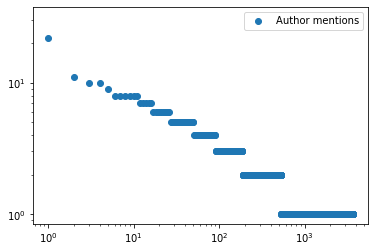

In [85]:
import matplotlib.pyplot as plt
x = len(final)
y = sorted(final.values(), reverse=True)
plt.scatter(range(x), y,label="Author mentions")
plt.yscale('log')
plt.xscale('log')
plt.legend()

# Most occuring authors


['goethe johann wolfgang', 'bumke joachim', 'dürrenmatt friedrich', 'schiller friedrich', 'mann thomas „der', 'nietzsche friedrich', 'freud sigmund', 'hoffmann eta', 'adorno theodor w', 'bußmann hadumod', 'hartmann von', 'wilpert gero', 'fleischer wolfgang', 'franz kafka', 'lessing gotthold ephraim', 'martinez matias', 'grimm jacob', 'büchner georg', 'arnold heinz', 'ruh kurt']
[32, 22, 11, 10, 10, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6]


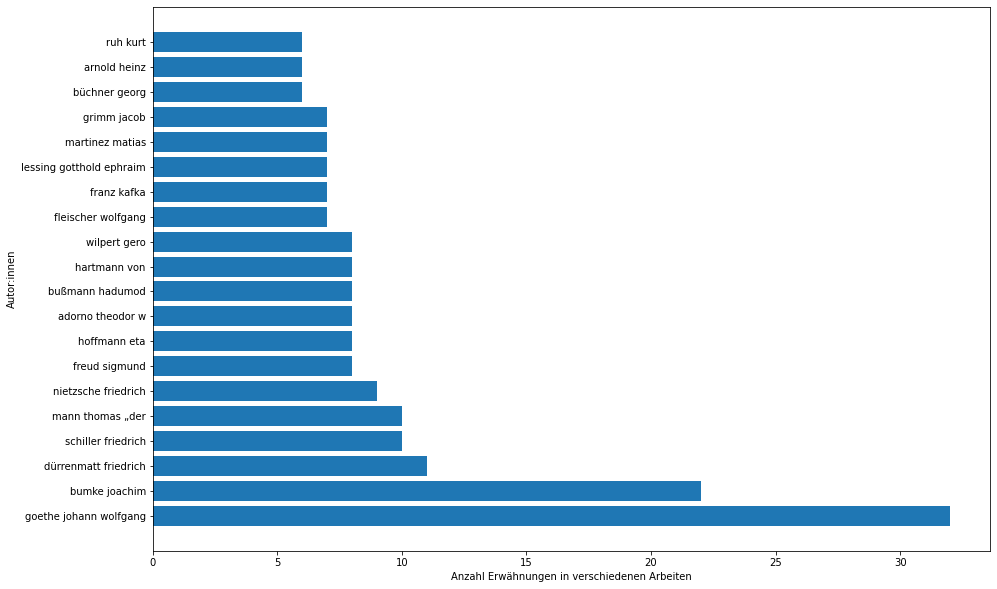

In [86]:
import matplotlib.pyplot as plt
   
name = [k for k in list(final.keys())[:20]]
nums = [n for n in list(final.values())[:20]]
print(name)
print(nums)

plt.figure(figsize=(15,10))
plt.barh(name,nums)
plt.ylabel('Authors')
plt.xlabel('Number of mentions in different works')


plt.show()
